In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 1.Załadowanie pliku

In [7]:
!unzip -q "/content/archive (2).zip" -d data/

In [8]:
all_file_names = glob.glob("data/*2017.csv")

In [9]:
all_file_names

['data/march-2017.csv',
 'data/june-2017.csv',
 'data/may-2017.csv',
 'data/december-2017.csv',
 'data/august-2017.csv',
 'data/october-2017.csv',
 'data/july-2017.csv',
 'data/november-2017.csv',
 'data/april-2017.csv',
 'data/january-2017.csv',
 'data/september-2017.csv',
 'data/february-2017.csv']

In [10]:
jan = pd.read_csv('/content/data/january-2017.csv')
feb = pd.read_csv('/content/data/february-2017.csv')
mar = pd.read_csv('/content/data/march-2017.csv')
apr = pd.read_csv('/content/data/april-2017.csv')
may = pd.read_csv('/content/data/may-2017.csv')
jun = pd.read_csv('/content/data/june-2017.csv')
jul = pd.read_csv('/content/data/july-2017.csv')
aug = pd.read_csv('/content/data/august-2017.csv')
sep = pd.read_csv('/content/data/september-2017.csv')
octo = pd.read_csv('/content/data/october-2017.csv')
nov = pd.read_csv('/content/data/november-2017.csv')
dec = pd.read_csv('/content/data/december-2017.csv')
sensor_loc = pd.read_csv('/content/data/sensor_locations.csv')

1.2 Analiza danych

In [11]:
jan.sample(5)

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
483,2017-01-21T03:00:00,NaN,NaN,102217.0,75.0,78.0,116.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,2017-01-16T04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,2017-01-22T04:00:00,NaN,NaN,102276.0,39.0,38.0,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,2017-01-12T20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,2017-01-02T10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
jan.shape

(744, 337)

In [13]:
jan.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 337 columns):
 #    Column           Non-Null Count  Dtype  
---   ------           --------------  -----  
 0    UTC time         744 non-null    object 
 1    3_temperature    18 non-null     float64
 2    3_humidity       18 non-null     float64
 3    3_pressure       335 non-null    float64
 4    3_pm1            335 non-null    float64
 5    3_pm25           335 non-null    float64
 6    3_pm10           335 non-null    float64
 7    140_temperature  0 non-null      float64
 8    140_humidity     0 non-null      float64
 9    140_pressure     0 non-null      float64
 10   140_pm1          0 non-null      float64
 11   140_pm25         0 non-null      float64
 12   140_pm10         0 non-null      float64
 13   142_temperature  691 non-null    float64
 14   142_humidity     691 non-null    float64
 15   142_pressure     691 non-null    float64
 16   142_pm1          666 non-null    float64
 

<ipython-input-13-59cf63e7900f>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  jan.info(verbose=True, null_counts=True)


In [14]:
feb.shape

(672, 337)

In [15]:
sensor_loc.head(10)

,id,latitude,longitude
0,3,50.057748,19.961375
1,140,50.057747,19.961374
2,142,50.084816,19.878066
3,147,50.048924,19.962262
4,169,50.048699,20.101569
5,170,50.077467,19.895577
6,171,50.084134,19.968416
7,172,50.073094,19.886750
8,173,50.057537,19.897547
9,174,50.057242,19.914874


In [16]:
sensor_loc.shape

(56, 3)

*Mamy 57 czytników sensorycznych

#2. Utworzenie wspólnego df

In [17]:
year = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec])

In [18]:
year.shape

(8593, 337)

2.1 Przekształcenie kolumny z datą i czasem na czytelny indeks

In [19]:
year["UTC time"] = pd.to_datetime(year["UTC time"], format="%Y-%m-%dT%H:%M:%S")
year = year.set_index("UTC time")
year[:30]

,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
UTC time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2.2 Analiza występowania pyłu PM10 na miesiące

In [20]:
columns_pm10 = [ i  for i in year.columns if  i.split("_")[1] == "pm10"]
print(columns_pm10)

['3_pm10', '140_pm10', '142_pm10', '147_pm10', '169_pm10', '170_pm10', '171_pm10', '172_pm10', '173_pm10', '174_pm10', '176_pm10', '177_pm10', '178_pm10', '179_pm10', '180_pm10', '181_pm10', '182_pm10', '183_pm10', '184_pm10', '185_pm10', '187_pm10', '189_pm10', '192_pm10', '194_pm10', '195_pm10', '196_pm10', '201_pm10', '202_pm10', '203_pm10', '204_pm10', '205_pm10', '208_pm10', '209_pm10', '210_pm10', '211_pm10', '212_pm10', '213_pm10', '214_pm10', '215_pm10', '216_pm10', '218_pm10', '219_pm10', '220_pm10', '221_pm10', '222_pm10', '223_pm10', '225_pm10', '226_pm10', '227_pm10', '228_pm10', '263_pm10', '622_pm10', '713_pm10', '808_pm10', '857_pm10', '895_pm10']


In [21]:
months = year[columns_pm10].groupby(pd.Grouper(freq='1M', origin='start')).mean()
months.head()

,3_pm10,140_pm10,142_pm10,147_pm10,169_pm10,170_pm10,171_pm10,172_pm10,173_pm10,174_pm10,...,225_pm10,226_pm10,227_pm10,228_pm10,263_pm10,622_pm10,713_pm10,808_pm10,857_pm10,895_pm10
UTC time,,,,,,,,,,,,,,,,,,,,,
2017-01-31,178.758209,NaN,144.864865,175.748318,115.745253,140.780914,144.773890,143.294751,131.528226,137.084011,...,180.898352,140.586022,125.161103,147.278226,116.173620,NaN,NaN,NaN,NaN,NaN
2017-02-28,100.640835,NaN,91.428105,111.229167,79.041667,84.004464,90.244745,84.727685,84.238095,82.745536,...,90.101362,87.153274,65.121622,93.491071,76.195231,NaN,NaN,NaN,NaN,NaN
2017-03-31,50.541485,61.554252,62.778090,65.456989,47.107962,52.533602,56.854839,55.805108,50.059140,50.940860,...,47.298789,51.320704,50.748911,56.290323,45.512097,65.905660,NaN,NaN,NaN,NaN
2017-04-30,NaN,40.392216,NaN,42.404167,32.302778,32.449093,34.800000,36.409218,32.859722,33.551389,...,30.169444,34.177778,33.044053,35.419718,29.831190,42.396114,NaN,NaN,NaN,40.968750
2017-05-31,NaN,39.436828,NaN,38.116848,27.967742,29.728513,30.919246,32.566396,31.367403,31.088710,...,26.528937,32.484522,29.425352,33.452703,27.159401,38.310811,24.0,NaN,NaN,35.954301


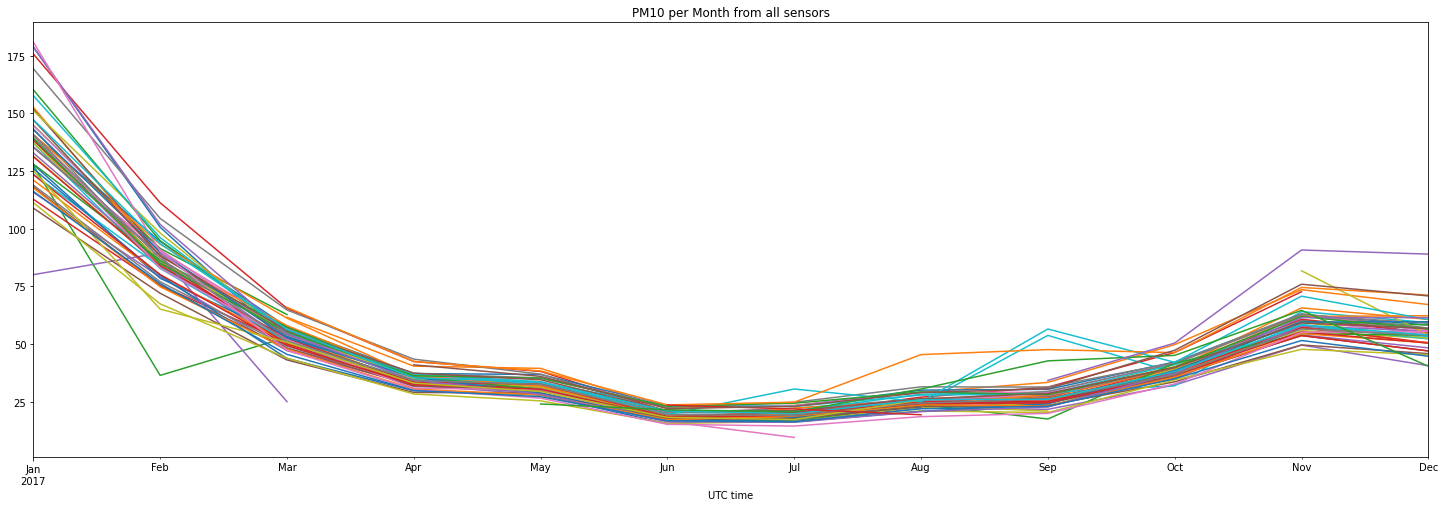

<Figure size 432x288 with 0 Axes>

In [22]:
months.plot(figsize=(25,8), legend=False, subplots=False)
plt.title("PM10 per Month from all sensors")
plt.show()
plt.savefig('PM10_per_Month_from_all_sensors.png')

In [23]:
quarter = year[columns_pm10].groupby(pd.Grouper(freq='Q', origin='start')).mean()
quarter.head()
     

,3_pm10,140_pm10,142_pm10,147_pm10,169_pm10,170_pm10,171_pm10,172_pm10,173_pm10,174_pm10,...,225_pm10,226_pm10,227_pm10,228_pm10,263_pm10,622_pm10,713_pm10,808_pm10,857_pm10,895_pm10
UTC time,,,,,,,,,,,,,,,,,,,,,
2017-03-31,112.540891,61.554252,99.061307,117.659565,78.813692,92.720833,97.524385,94.968343,88.754167,90.377437,...,106.188555,93.312761,83.917563,99.204167,79.381372,65.905660,NaN,NaN,NaN,NaN
2017-06-30,NaN,33.906015,NaN,33.805069,25.646330,26.686691,27.631144,29.812966,27.741874,28.071166,...,24.330795,28.723932,27.483556,29.987980,24.352317,34.652686,21.510959,23.514706,NaN,33.072318
2017-09-30,NaN,28.459217,NaN,25.999547,20.216500,21.774779,21.951117,24.890810,21.169914,22.474436,...,17.663577,23.147192,19.751724,23.855835,20.375510,31.244976,30.467662,21.448598,34.197092,27.466033
2017-12-31,NaN,63.040176,NaN,58.939076,40.766142,48.449421,52.088900,51.419916,47.749510,48.365641,...,47.015196,48.504169,NaN,49.739733,43.512575,63.273395,51.209085,75.189716,75.486726,64.039686


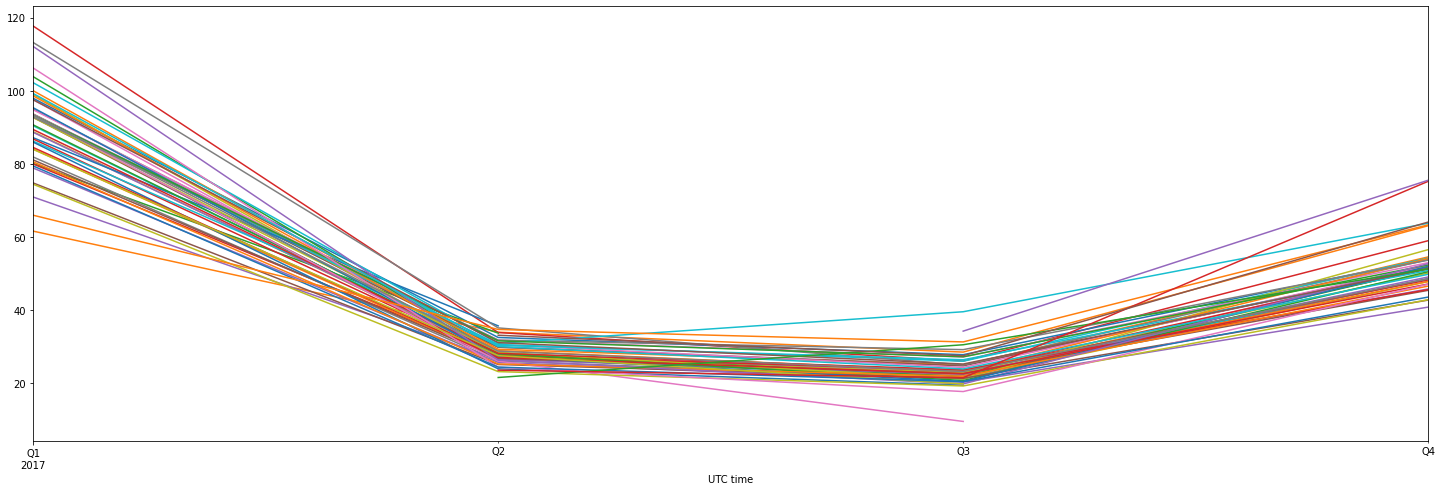

In [24]:
quarter.plot(figsize=(25,8), legend=False, subplots=False)
plt.show()

In [25]:
year_hour = [x for x in pd.date_range(start='2017-01-01', end="2017-12-31", freq="1H")  ]
len(year_hour)

8737

<AxesSubplot:xlabel='UTC time'>

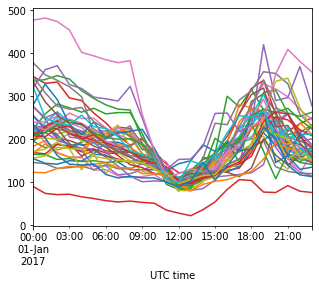

In [26]:
year[columns_pm10].loc['2017-01-01'].plot(figsize=(5,4), legend=False, subplots=False)

<AxesSubplot:xlabel='UTC time'>

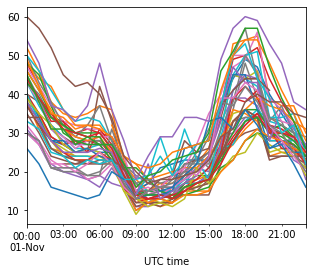

In [27]:
year[columns_pm10].loc['2017-11-01'].plot(figsize=(5,4), legend=False, subplots=False)

<AxesSubplot:xlabel='UTC time'>

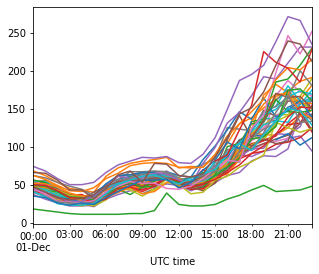

In [28]:
year[columns_pm10].loc['2017-12-01'].plot(figsize=(5,4), legend=False, subplots=False)

2.3 Połączenie wartości wg ID sensora

In [29]:
new_df = pd.DataFrame()

for i in year.groupby(year.columns.str.split('_').str[0], axis=1):
  old = i[1].columns
  new = i[1].columns.str.split("_").str[1]
  zmiana = { k:v  for k,v in zip(old,new)}
  i[1].rename(columns=zmiana,inplace=True)
  i[1]["id"] = i[0]
  new_df = new_df.append(i[1])

In [30]:
new_df.head(-10) 

,temperature,humidity,pressure,pm1,pm25,pm10,id
UTC time,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
...,...,...,...,...,...,...,...
2017-12-24 10:00:00,5.0,92.0,101802.0,17.0,20.0,35.0,895
2017-12-24 11:00:00,5.0,92.0,101783.0,17.0,20.0,35.0,895
2017-12-24 12:00:00,5.0,92.0,101788.0,18.0,22.0,40.0,895


In [31]:
new_df.shape

(481208, 7)

In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 481208 entries, 2017-01-01 00:00:00 to 2017-12-25 00:00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   temperature  371650 non-null  float64
 1   humidity     371570 non-null  float64
 2   pressure     308679 non-null  float64
 3   pm1          388354 non-null  float64
 4   pm25         388373 non-null  float64
 5   pm10         388376 non-null  float64
 6   id           481208 non-null  object 
dtypes: float64(6), object(1)
memory usage: 29.4+ MB


In [33]:
new_df["id"] = new_df["id"].astype(int)

In [34]:
sensor_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         56 non-null     int64  
 1   latitude   56 non-null     float64
 2   longitude  56 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.4 KB


2.4 Przypisanie danych geograficznych wg ID sensora

In [35]:
sensor_new = new_df.reset_index().merge(sensor_loc, how="left")

In [36]:
sensor_new.head()

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
3,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
4,2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374


2.5 Usuwanie brakujących danych

In [37]:
sensor_new.isnull().sum()

UTC time            0
temperature    109558
humidity       109638
pressure       172529
pm1             92854
pm25            92835
pm10            92832
id                  0
latitude            0
longitude           0
dtype: int64

In [38]:
sensor_geo = sensor_new.dropna()
sensor_geo.shape

(291754, 10)

In [39]:
sensor_geo.head()

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude
1811,2017-03-17 11:00:00,12.0,44.0,101244.0,16.0,10.0,22.0,140,50.057747,19.961374
1812,2017-03-17 12:00:00,12.0,45.0,101147.0,18.0,12.0,26.0,140,50.057747,19.961374
1813,2017-03-17 13:00:00,12.0,43.0,101049.0,18.0,12.0,26.0,140,50.057747,19.961374
1814,2017-03-17 14:00:00,12.0,45.0,100930.0,23.0,17.0,32.0,140,50.057747,19.961374
1815,2017-03-17 15:00:00,12.0,50.0,100873.0,29.0,24.0,45.0,140,50.057747,19.961374


In [40]:
sensor_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291754 entries, 1811 to 481207
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   UTC time     291754 non-null  datetime64[ns]
 1   temperature  291754 non-null  float64       
 2   humidity     291754 non-null  float64       
 3   pressure     291754 non-null  float64       
 4   pm1          291754 non-null  float64       
 5   pm25         291754 non-null  float64       
 6   pm10         291754 non-null  float64       
 7   id           291754 non-null  int64         
 8   latitude     291754 non-null  float64       
 9   longitude    291754 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 24.5 MB


In [41]:
sensor_geo.head()

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude
1811,2017-03-17 11:00:00,12.0,44.0,101244.0,16.0,10.0,22.0,140,50.057747,19.961374
1812,2017-03-17 12:00:00,12.0,45.0,101147.0,18.0,12.0,26.0,140,50.057747,19.961374
1813,2017-03-17 13:00:00,12.0,43.0,101049.0,18.0,12.0,26.0,140,50.057747,19.961374
1814,2017-03-17 14:00:00,12.0,45.0,100930.0,23.0,17.0,32.0,140,50.057747,19.961374
1815,2017-03-17 15:00:00,12.0,50.0,100873.0,29.0,24.0,45.0,140,50.057747,19.961374


#3. Zamiana UTC Time na dane kategoryczne 

Z wykresów z pkt 2.2 odczytać możemy miesiące charakteryzujące się występowaniem pyłu P10 w wyżyszm stopniu. To samo dotyczy godzin z wybranych miesięcy.\


3.1 Dzielimy zbiór wg:\
lato = okres od kwietnia do końca września\
zima = okres od października do końca marca\
dzien = godziny od 10-16\
noc = godziny od 17-9

In [42]:
import datetime

In [43]:
def season(x):
    if x in [4,5,6,7,8,9]:
       return "lato"
    elif x in [1,2,3,10,11,12]:
       return "zima"
    else:
       return "bład"

In [44]:
sensor_geo["season"] = sensor_geo["UTC time"].dt.month.apply(season)


<ipython-input-44-b0d530e16e32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_geo["season"] = sensor_geo["UTC time"].dt.month.apply(season)


In [45]:
sensor_geo.head()

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude,season
1811,2017-03-17 11:00:00,12.0,44.0,101244.0,16.0,10.0,22.0,140,50.057747,19.961374,zima
1812,2017-03-17 12:00:00,12.0,45.0,101147.0,18.0,12.0,26.0,140,50.057747,19.961374,zima
1813,2017-03-17 13:00:00,12.0,43.0,101049.0,18.0,12.0,26.0,140,50.057747,19.961374,zima
1814,2017-03-17 14:00:00,12.0,45.0,100930.0,23.0,17.0,32.0,140,50.057747,19.961374,zima
1815,2017-03-17 15:00:00,12.0,50.0,100873.0,29.0,24.0,45.0,140,50.057747,19.961374,zima


In [46]:
def hours(x):
    if x in [10,11,12,13,14,15,16]:
       return "dzien"
    elif x in [1,2,3,4,5,6,7,8,9,17,18,19,20,21,22,23,24,0]:
       return "noc"
    else:
       return "bład"

In [47]:
sensor_geo["time_of_day"] = sensor_geo["UTC time"].dt.hour.apply(hours)

<ipython-input-47-b99c762f30da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_geo["time_of_day"] = sensor_geo["UTC time"].dt.hour.apply(hours)


In [48]:
sensor_geo.head()

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude,season,time_of_day
1811,2017-03-17 11:00:00,12.0,44.0,101244.0,16.0,10.0,22.0,140,50.057747,19.961374,zima,dzien
1812,2017-03-17 12:00:00,12.0,45.0,101147.0,18.0,12.0,26.0,140,50.057747,19.961374,zima,dzien
1813,2017-03-17 13:00:00,12.0,43.0,101049.0,18.0,12.0,26.0,140,50.057747,19.961374,zima,dzien
1814,2017-03-17 14:00:00,12.0,45.0,100930.0,23.0,17.0,32.0,140,50.057747,19.961374,zima,dzien
1815,2017-03-17 15:00:00,12.0,50.0,100873.0,29.0,24.0,45.0,140,50.057747,19.961374,zima,dzien


In [49]:
sensor_geo['season'] = sensor_geo['season'].replace({'lato': 0})
sensor_geo['season'] = sensor_geo['season'].replace({'zima': 1})

<ipython-input-49-27a1d42905f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_geo['season'] = sensor_geo['season'].replace({'lato': 0})
<ipython-input-49-27a1d42905f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_geo['season'] = sensor_geo['season'].replace({'zima': 1})


In [50]:
sensor_geo['season'] = sensor_geo['season'].astype(int)

<ipython-input-50-69941db15fd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_geo['season'] = sensor_geo['season'].astype(int)


In [51]:
sensor_geo['time_of_day'] = sensor_geo['time_of_day'].replace({'dzien': 0})
sensor_geo['time_of_day'] = sensor_geo['time_of_day'].replace({'noc': 1})


<ipython-input-51-684021232b87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_geo['time_of_day'] = sensor_geo['time_of_day'].replace({'dzien': 0})
<ipython-input-51-684021232b87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_geo['time_of_day'] = sensor_geo['time_of_day'].replace({'noc': 1})


In [52]:
sensor_geo['time_of_day'] = sensor_geo['time_of_day'].astype(int)

<ipython-input-52-c50dc2542332>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_geo['time_of_day'] = sensor_geo['time_of_day'].astype(int)


In [53]:
sensor_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291754 entries, 1811 to 481207
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   UTC time     291754 non-null  datetime64[ns]
 1   temperature  291754 non-null  float64       
 2   humidity     291754 non-null  float64       
 3   pressure     291754 non-null  float64       
 4   pm1          291754 non-null  float64       
 5   pm25         291754 non-null  float64       
 6   pm10         291754 non-null  float64       
 7   id           291754 non-null  int64         
 8   latitude     291754 non-null  float64       
 9   longitude    291754 non-null  float64       
 10  season       291754 non-null  int64         
 11  time_of_day  291754 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(3)
memory usage: 28.9 MB


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
sensor_geo['pm10'].max()

664.0

In [56]:
sensor_geo['pm10'].min()

-1.0

In [57]:
sensor_geo.describe()

,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude,season,time_of_day
count,291754.000000,291754.000000,291754.000000,291754.000000,291754.000000,291754.000000,291754.000000,291754.000000,291754.000000,291754.000000,291754.000000
mean,8.652649,14.542224,101695.063139,30.763133,31.035808,49.589233,235.701471,50.058520,19.940555,0.527414,0.708419
std,8.305993,446.886598,789.662950,31.252953,36.262757,53.379528,139.249796,0.029272,0.058182,0.499249,0.454491
min,-22.000000,-10157.000000,97386.000000,0.000000,0.000000,-1.000000,3.000000,49.998480,19.826993,0.000000,0.000000
25%,2.000000,59.000000,101254.000000,13.000000,10.000000,17.000000,187.000000,50.042476,19.897547,0.000000,0.000000
50%,8.000000,79.000000,101725.000000,22.000000,20.000000,34.000000,210.000000,50.062006,19.937998,1.000000,1.000000
75%,14.000000,90.000000,102187.000000,35.000000,36.000000,61.000000,221.000000,50.079672,19.968416,1.000000,1.000000
max,46.000000,337.000000,104217.000000,311.000000,397.000000,664.000000,895.000000,50.108024,20.101569,1.000000,1.000000


Dla PM10 są wartości odstające, wartość na pewno nie może być ujemna -1, Normy zaczynają sie od 25 a kończna na 150 . \

Istotny jest fakt że 99% danych mieści się w zakresie od 0 do 282.

<AxesSubplot:>

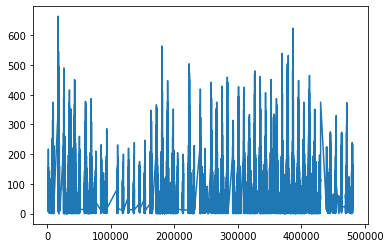

In [58]:
sensor_geo.pm10.plot()

In [59]:
sensor_geo=sensor_geo[sensor_geo['pm10']!=-1] # usuwam wartość -1, gdyż odczyt nie może być ujemny

In [60]:
sensor_geo.describe()

,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude,season,time_of_day
count,291753.000000,291753.000000,291753.000000,291753.000000,291753.000000,291753.000000,291753.000000,291753.000000,291753.000000,291753.000000,291753.000000
mean,8.652655,14.542051,101695.069994,30.763238,31.035914,49.589406,235.701631,50.058520,19.940555,0.527412,0.708418
std,8.306006,446.887354,789.655621,31.252954,36.262774,53.379538,139.250008,0.029272,0.058182,0.499249,0.454492
min,-22.000000,-10157.000000,97386.000000,0.000000,0.000000,0.000000,3.000000,49.998480,19.826993,0.000000,0.000000
25%,2.000000,59.000000,101254.000000,13.000000,10.000000,17.000000,187.000000,50.042476,19.897547,0.000000,0.000000
50%,8.000000,79.000000,101725.000000,22.000000,20.000000,34.000000,210.000000,50.062006,19.937998,1.000000,1.000000
75%,14.000000,90.000000,102187.000000,35.000000,36.000000,61.000000,221.000000,50.079672,19.968416,1.000000,1.000000
max,46.000000,337.000000,104217.000000,311.000000,397.000000,664.000000,895.000000,50.108024,20.101569,1.000000,1.000000


3.2. Podział PM10 wg indeksu jakości powietrza 

bardzo dobry(0) - dobry = wartości od 0 do 50 \
umiarkowany - dostateczny (1) = wartości od 50,1 do 110 \
zły - bardzo zły(2) = wartości >110,1

In [61]:
sensor_geo.reset_index(inplace = True,drop = True)

In [62]:
description = []
for i in range(len(sensor_geo)):
  if sensor_geo['pm10'][i]<=50.00:
    description.append('clean')
  elif sensor_geo['pm10'][i]>50 and sensor_geo['pm10'][i]<=110:
    description.append('sufficient')
  elif sensor_geo['pm10'][i]>=110:
    description.append('dirty')
  else:
    description.append('error')

In [63]:
# sensor_geo['pm10']=pd.cut(sensor_geo['pm10'], bins=[0,50, 110, 664], labels=['0', '1', '2'])

In [64]:
sensor_geo['air']=description

In [65]:
sensor_geo.head()

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude,season,time_of_day,air
0,2017-03-17 11:00:00,12.0,44.0,101244.0,16.0,10.0,22.0,140,50.057747,19.961374,1,0,clean
1,2017-03-17 12:00:00,12.0,45.0,101147.0,18.0,12.0,26.0,140,50.057747,19.961374,1,0,clean
2,2017-03-17 13:00:00,12.0,43.0,101049.0,18.0,12.0,26.0,140,50.057747,19.961374,1,0,clean
3,2017-03-17 14:00:00,12.0,45.0,100930.0,23.0,17.0,32.0,140,50.057747,19.961374,1,0,clean
4,2017-03-17 15:00:00,12.0,50.0,100873.0,29.0,24.0,45.0,140,50.057747,19.961374,1,0,clean


Text(0.5, 1.0, 'ilość przypadków z podziałem na jakość powietrza')

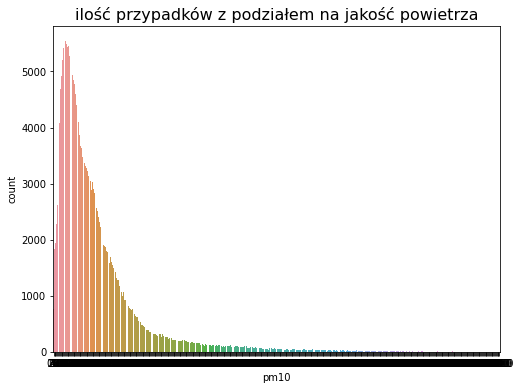

In [66]:
plt.figure(figsize=(8,6))
sns.countplot(x='pm10', data=sensor_geo)
plt.title('ilość przypadków z podziałem na jakość powietrza', fontsize=16)

In [67]:
sensor_geo['pm10'] = sensor_geo['pm10'].replace({'0': 0})
sensor_geo['pm10'] = sensor_geo['pm10'].replace({'1': 1})

In [68]:
sensor_geo.isnull().sum()

UTC time       0
temperature    0
humidity       0
pressure       0
pm1            0
pm25           0
pm10           0
id             0
latitude       0
longitude      0
season         0
time_of_day    0
air            0
dtype: int64

In [69]:
sensor_geo_new = sensor_geo.dropna()
sensor_geo_new.shape

(291753, 13)

In [70]:
sensor_geo_new['pm10'] = sensor_geo_new['pm10'].astype(int)


In [71]:
sensor_geo['air'] = sensor_geo['air'].replace({'clean': 0})
sensor_geo['air'] = sensor_geo['air'].replace({'sufficient': 1})
sensor_geo['air'] = sensor_geo['air'].replace({'dirty': 2})
sensor_geo['air'] = sensor_geo['air'].astype(int)

<AxesSubplot:>

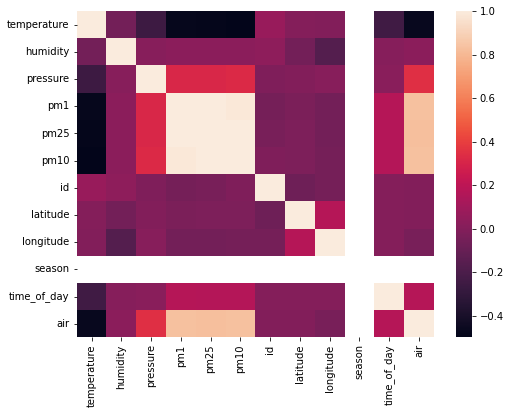

In [72]:
winter=sensor_geo[sensor_geo['season']==1]

corr1=winter.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr1)

4. Analiza grupy "0" dobrej jakości powietrza

In [73]:
dirty_air=sensor_geo_new[sensor_geo_new['pm10']==2]

In [74]:
dirty_air.shape

(1945, 13)

In [75]:
corr1=dirty_air.corr()

<AxesSubplot:>

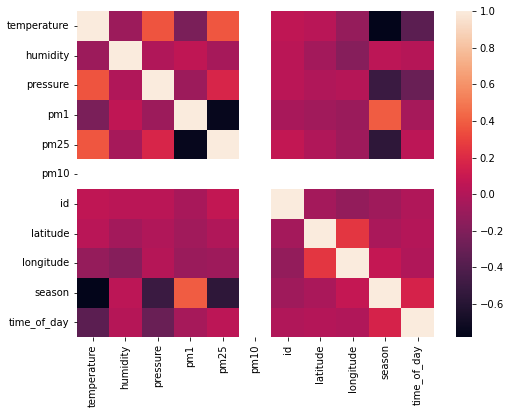

In [76]:
plt.figure(figsize=(8,6))
sns.heatmap(corr1)

In [77]:
corr2=sensor_geo.corr()

<AxesSubplot:>

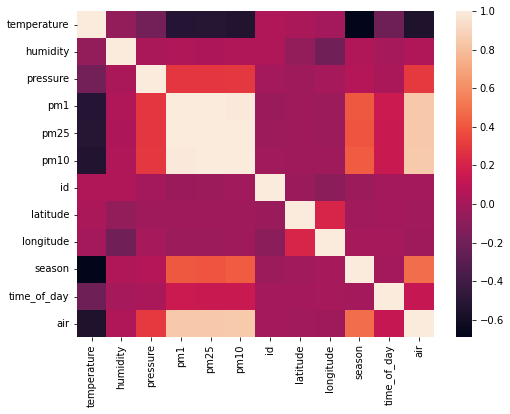

In [78]:
plt.figure(figsize=(8,6))
sns.heatmap(corr2)

#Regresja logistyczna na podstawie powyższej heatmapy

In [79]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score

In [80]:
y=winter['air']
X=winter[['temperature', 'time_of_day', 'pressure', 'humidity', 'latitude', 'longitude' ]]

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=123)

model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [81]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63     14202
           1       0.00      0.00      0.00     11434
           2       0.00      0.00      0.00      5139

    accuracy                           0.46     30775
   macro avg       0.15      0.33      0.21     30775
weighted avg       0.21      0.46      0.29     30775



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Drzewo decyzyjne

In [83]:
model=DecisionTreeRegressor()
model.fit(X,y)

DecisionTreeRegressor()

In [84]:
model.get_depth()

40

In [85]:
model.get_n_leaves()

39212

In [86]:
from sklearn import tree
model_drzewo=tree.DecisionTreeClassifier(max_depth=6, min_samples_split=3)
model_drzewo=model_drzewo.fit(X_train,y_train)

In [87]:
model_drzewo.get_n_leaves()

63

In [88]:
r2_score(y_test, y_pred_test)

-0.9187840961798759

Wynik R2 jest na poziomie ujemnym. Jest to znak, że model nie jest odpowiedni dla danych, które posiadamy. 

##Drugi model, który obejmuję wilgotność, sezon, ciśnienie i temperaturę
##Regresja logistyczna

In [89]:
X2=winter[['temperature','pressure','season','humidity','time_of_day',]]
y2=winter['air']

In [90]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2, test_size=0.2,random_state=123)

In [91]:
model2=LogisticRegression()
model2.fit(X2_train, y2_train)

LogisticRegression()

In [92]:
y2_pred_train=model2.predict(X2_train)
y2_pred_test=model2.predict(X2_test)

In [93]:
print(classification_report(y2_test, y2_pred_test))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63     14202
           1       0.00      0.00      0.00     11434
           2       0.00      0.00      0.00      5139

    accuracy                           0.46     30775
   macro avg       0.15      0.33      0.21     30775
weighted avg       0.21      0.46      0.29     30775



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
r2_score(y2_test, y2_pred_test)

-0.9187840961798759

Przy regresji logistycznej również posiadamy ujemne dane.

współczynnika determinacji R^2, jest opisową miarą siły liniowego związku między zmiennymi, czyli miarą dopasowania linii regresji do danych

##Regresja liniowa

In [96]:
X3=winter[['temperature', 'time_of_day', 'pressure', 'humidity', 'latitude', 'longitude' ]]
y3=winter['pm10']
X3_train, X3_test, y3_train, y3_test=train_test_split(X3,y3, test_size=0.2, random_state=123)

In [112]:
model3=LinearRegression()
model3.fit(X3_train, y3_train)

LinearRegression()

In [98]:
y3_pred_train=model3.predict(X3_train)
y3_pred_test=model3.predict(X3_test)

In [113]:
r2_score(y3_test, y3_pred_test)

0.29460624500103816

Regresja liniowa wyjaśnia tylko 29% danych ze zbioru.

##Model głębokiego uczenia

Wczytywanie danych

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
import tensorflow as tf

In [100]:
lebels=sensor_geo['pm10']
X5=sensor_geo[['temperature','pressure','season','humidity','time_of_day','latitude', 'longitude']]
y5=np.ravel(lebels)

In [101]:
X5_train,X5_test,y5_train,y5_test=train_test_split(X5,y5, test_size=0.2,random_state=123)

In [102]:
X5_train.shape

(233402, 7)

In [103]:
y_train.shape

(123099,)

In [104]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X5_train)
X5_train=scaler.transform(X5_train)
X5_test=scaler.transform(X5_test)

In [105]:
y5_train.shape

(233402,)

In [106]:
X5_train.shape

(233402, 7)

##Głebokie uczenie##

In [107]:
model4 = Sequential()

# model.add(Input(...))
model4.add(Dense(512, activation='relu', input_shape=(None,7)))
model4.add(Dense(512, activation='relu'))
model4.add(Dense(512, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model4.fit(X5_train, y5_train,batch_size=1, epochs=10,verbose=1)


Epoch 1/10


  8031/233402 [>.............................] - ETA: 18:18 - loss: nan - accuracy: 0.0021

KeyboardInterrupt: ignored

Mechanizm uczenia został przerwany ze względu na badzo słebe wyniki w trakcie uczenia modelu. Strata była tak duża, że model nie był w stanie jej pokazać zaś dokładność była na poziomie 0.

W tym wypadku model był udczony w całości na Dense lecz  wprzypadku modelu LSTM rówież wyniki były podobne. 

##Tworzenie mapy z lokalizacją czujników mierzących zanieczyszczenie

In [108]:
import folium

In [109]:
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

In [110]:
# add marker one by one on the map
for i in range(0,len(sensor_loc)):
                folium.Marker(
      location=[sensor_loc.iloc[i]['latitude'], sensor_loc.iloc[i]['longitude']],
      popup=sensor_loc.iloc[i]['id'],
   ).add_to(m)

In [111]:
m